In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [21]:
blasts = pd.read_csv('/home/bmelo/bin/SeisBlast/files/Eire_blasts_relocated.csv')
double_blasts = pd.read_csv('/home/bmelo/bin/SeisBlast/files/Eire_blasts_toreview.csv',)

quarries_james = pd.read_csv(
    '/home/bmelo/bin/Quarry/James_files/IRELAND.quarry.coords.txt',
    sep = r'\s+',
    header=None,
    names=['name','co','lat','lon'])

#quarries_new = quarries_bruna[~quarries_bruna.apply(tuple, 1).isin(quarries_james[['lon', 'lat']].apply(tuple, 1))]
lost_blasts = pd.read_csv(
    '/home/bmelo/bin/SeisBlast/files/Eire_blasts_lost.csv')

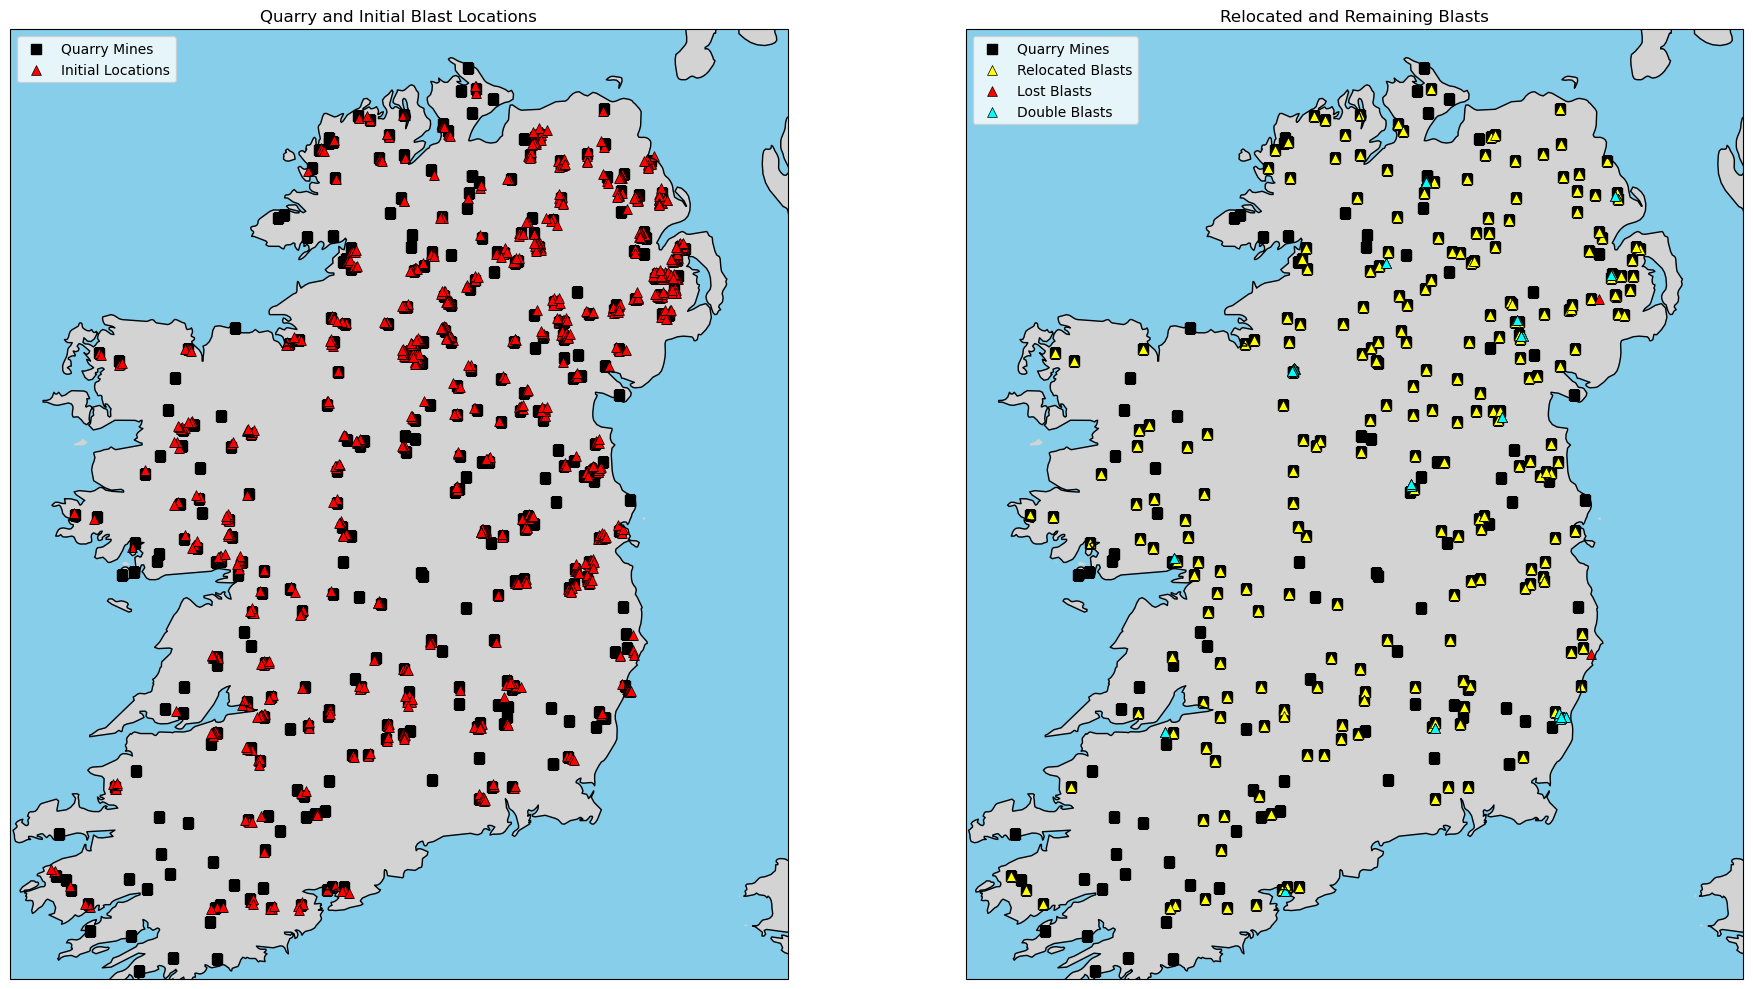

In [25]:
# Define the region as (min_lon, max_lon, min_lat, max_lat)
region = [-10.5, -5, 51.5, 55.5]  # Replace with your actual region

# Create a figure with two subplots
fig, axes = plt.subplots(
    nrows=1, ncols=2, 
    figsize=(20, 10),
    subplot_kw={"projection": ccrs.Mercator()})

# Common settings for both subplots
for ax in axes:
    ax.set_extent(region, crs=ccrs.PlateCarree())  # Set map region
    ax.add_feature(cfeature.LAND, color="lightgray")
    ax.add_feature(cfeature.OCEAN, color="skyblue")
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
    
    # ---- First Panel ----
ax1 = axes[0]
ax1.set_title("Quarry and Initial Blast Locations")

# ax1.scatter(quarries_new["lon"], quarries_new["lat"],
#             color="blue", marker="s", s=50, alpha=0.5, label="Quarry Mines",
#             transform=ccrs.PlateCarree())

# Plot quarry mine locations (black squares)
ax1.scatter(quarries_james["lon"], quarries_james["lat"],
            color="black", marker="s", s=50, label="Quarry Mines",
            transform=ccrs.PlateCarree())

# Plot initial blast locations (green triangles)
ax1.scatter(blasts["lon_ev"], blasts["lat_ev"],
            color="red", marker="^", s=50,
            edgecolors="black", linewidth=0.5,
            label="Initial Locations",
            transform=ccrs.PlateCarree())

ax1.legend(loc="upper left")

# ---- Second Panel ----
ax2 = axes[1]
ax2.set_title("Relocated and Remaining Blasts")

# Plot quarry mine locations (black squares)
ax2.scatter(quarries_james["lon"], quarries_james["lat"],
            color="black", marker="s", s=50, label="Quarry Mines",
            transform=ccrs.PlateCarree())

# Plot relocated blasts (green triangles)
ax2.scatter(blasts["lon-quarry"], blasts["lat-quarry"],
            color="yellow", marker="^", s=50,
            edgecolors="black", linewidth=0.5,
            label="Relocated Blasts",
            transform=ccrs.PlateCarree())

# Plot relocated blasts (green triangles)
ax2.scatter(lost_blasts["LON(deg)"], lost_blasts["LAT(deg)"],
            color="red", marker="^", s=50,
            edgecolors="black", linewidth=0.5,
            label="Lost Blasts",
            transform=ccrs.PlateCarree())

ax2.scatter(double_blasts["lon_ev"], double_blasts["lat_ev"],
            color="cyan", marker="^", s=50,
            edgecolors="black", linewidth=0.5,
            label="Double Blasts",
            transform=ccrs.PlateCarree())

ax2.legend(loc="upper left")

# Show the final map
plt.tight_layout()
plt.show()